# Image Classification with CNN for CIFAR_10 Data

In [1]:
# import datas

In [2]:
from tensorflow.keras.datasets import cifar10
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [6]:
import matplotlib.pyplot as plt

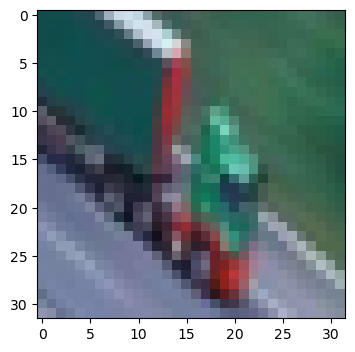

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[50])

In [8]:
class_names=["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

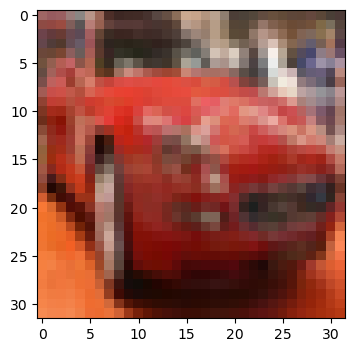

In [9]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[5])

In [10]:
# Modelling

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# Normalize the data set
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [13]:
# Convert the labels to categorical
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
# Split the data into train and test sets
train_size = int(0.8 * len(x_train))
x_train_subset = x_train[:train_size]
y_train_subset = y_train[:train_size]
x_test_subset = x_train[train_size:]
y_test_subset = y_train[train_size:]

In [15]:
model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 131s 165ms/step - loss: 1.5876 - accuracy: 0.4227 - val_loss: 1.3001 - val_accuracy: 0.5473
Epoch 2/10
782/782 [==============================] - 135s 172ms/step - loss: 1.2296 - accuracy: 0.5628 - val_loss: 1.1037 - val_accuracy: 0.6068
Epoch 3/10
782/782 [==============================] - 149s 190ms/step - loss: 1.0947 - accuracy: 0.6153 - val_loss: 0.9705 - val_accuracy: 0.6597
Epoch 4/10
782/782 [==============================] - 174s 222ms/step - loss: 1.0168 - accuracy: 0.6429 - val_loss: 0.9065 - val_accuracy: 0.6900
Epoch 5/10
782/782 [==============================] - 188s 241ms/step - loss: 0.9526 - accuracy: 0.6654 - val_loss: 0.8979 - val_accuracy: 0.6820
Epoch 6/10
782/782 [==============================] - 173s 221ms/step - loss: 0.8976 - accuracy: 0.6858 - val_loss: 0.8602 - val_accuracy: 0.7044
Epoch 7/10
782/782 [==============================] - 175s 224ms/step - loss: 0.8644 - accuracy: 0.6976 - val_loss: 0.8423 -

In [18]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 - 12s - loss: 0.7844 - accuracy: 0.7272 - 12s/epoch - 39ms/step
Test loss: 0.7844125032424927
Test accuracy: 0.7271999716758728


In [19]:
# Plot the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0